In [1]:
# Default imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', index_col='Id')
test = pd.read_csv('test.csv', index_col='Id')
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [4]:
# all feature columns
train.columns[:-1]

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## Outliers

We'll remove some houses that have too large area square feet of some features and too low price.

Text(0,0.5,'SalePrice')

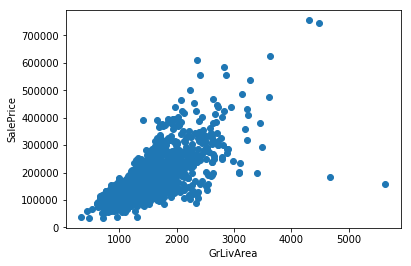

In [5]:
plt.scatter(train.GrLivArea, train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

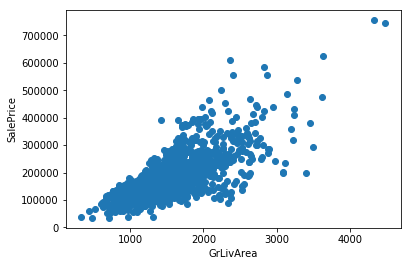

In [6]:
train = train.drop(train[(train.GrLivArea>4000) & (train.SalePrice<300000)].index)
plt.scatter(train.GrLivArea, train.SalePrice)
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

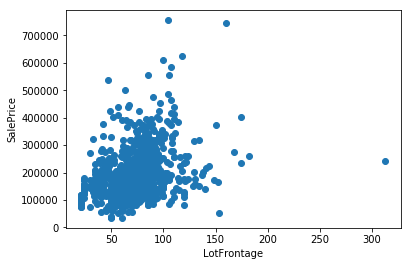

In [7]:
plt.scatter(train.LotFrontage, train.SalePrice)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

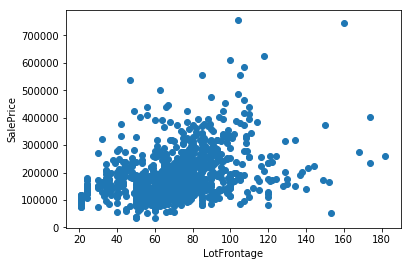

In [8]:
train = train.drop(train[train.LotFrontage > 300].index)
plt.scatter(train.LotFrontage, train.SalePrice)
plt.xlabel('LotFrontage')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

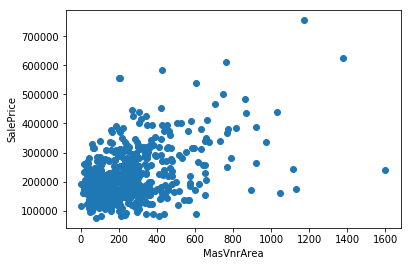

In [9]:
plt.scatter(train[train.MasVnrArea != 0].MasVnrArea, train[train.MasVnrArea != 0].SalePrice)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

Text(0,0.5,'SalePrice')

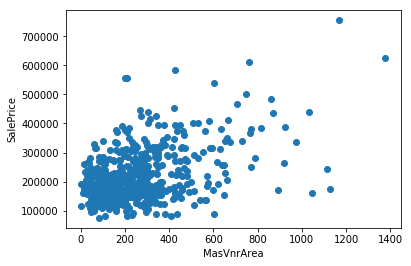

In [10]:
train = train.drop(train[train.MasVnrArea > 1500].index)
plt.scatter(train[train.MasVnrArea != 0].MasVnrArea, train[train.MasVnrArea != 0].SalePrice)
plt.xlabel('MasVnrArea')
plt.ylabel('SalePrice')

Now, let's concatenate the train and test data for faster data maniputation****.

In [11]:
train_last_id = train.shape[0]
y = train.SalePrice
df = pd.concat((train, test))
df.drop(['SalePrice'], axis=1, inplace=True)
df.shape

(2915, 79)

## Missing data

In [12]:
print('{} NaN values'.format(df.isnull().sum().sum()))

13951 NaN values


In [13]:
df.columns[df.isnull().any()]

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

### Nones

In columns like Alley, a NaN value means the absence of the feature. So we'll fill them with 'None'.

In [14]:
cols = ['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'BsmtQual', 'Fence', 'FireplaceQu', 'GarageCond', 'GarageFinish',
        'GarageQual', 'GarageType', 'MiscFeature', 'PoolQC']
df.loc[:, cols] = df.loc[:, cols].fillna('None')
print('{} NaN values'.format(df[cols].isnull().sum().sum()))

0 NaN values


### Categorical variables

Columns like Electrical are categorical so can be filled with the most frequent value.

In [15]:
cols = ['Electrical', 'Exterior1st', 'Exterior2nd', 'Functional', 'KitchenQual', 'MasVnrType', 'MSZoning', 'SaleType']
for col in cols:
    df.loc[:, col].fillna(df[col].mode()[0], inplace=True)
print('{} NaN values'.format(df[cols].isnull().sum().sum()))

0 NaN values


### Rest

In [16]:
cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath',
        'GarageYrBlt', 'GarageArea', 'GarageCars', 'MasVnrArea', 'TotalBsmtSF', 'LotFrontage']
for col in cols:
    print('{}: {} rows'.format(col,df[df[col].isnull()].shape[0]))

BsmtFinSF1: 1 rows
BsmtFinSF2: 1 rows
BsmtUnfSF: 1 rows
BsmtFullBath: 2 rows
BsmtHalfBath: 2 rows
GarageYrBlt: 159 rows
GarageArea: 1 rows
GarageCars: 1 rows
MasVnrArea: 23 rows
TotalBsmtSF: 1 rows
LotFrontage: 486 rows


#### Basement related columns

In [17]:
bsmt_cols = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
             'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath','TotalBsmtSF']
null_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF']
df.loc[df[null_cols].isnull().any(axis=1), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
Id,,,,,,,,,,,
2121,None,None,None,None,NaN,None,NaN,NaN,NaN,NaN,NaN
2189,None,None,None,None,0.0,None,0.0,0.0,NaN,NaN,0.0


We'll fill them with zeros since they are without a basement.

In [18]:
df.loc[df[null_cols].isnull().any(axis=1), bsmt_cols] = df.loc[df[null_cols].isnull().any(axis=1), bsmt_cols].fillna(0.0)
df.loc[(df.index == 2121) | (df.index == 2189), bsmt_cols]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,BsmtFullBath,BsmtHalfBath,TotalBsmtSF
Id,,,,,,,,,,,
2121,None,None,None,None,0.0,None,0.0,0.0,0.0,0.0,0.0
2189,None,None,None,None,0.0,None,0.0,0.0,0.0,0.0,0.0


### Garage related columns

In [19]:
garage_cols = ['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
null_cols = ['GarageArea', 'GarageCars']
df.loc[df[null_cols].isnull().any(axis=1), garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2577,Detchd,NaN,None,NaN,NaN,None,None


GarageType tells us that this house has a garage so we'll fill the rest columns with their modes.

In [20]:
cols = ['GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
for col in cols:
    df.loc[df.index == 2577, col] = df.loc[df.GarageType == 'Detchd', col].mode().iloc[0]
df.loc[df.index == 2577, garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2577,Detchd,1950.0,Unf,2.0,576.0,TA,TA


In [21]:
df.loc[df.GarageYrBlt.isnull(), garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,None,NaN,None,0.0,0.0,None,None
49,None,NaN,None,0.0,0.0,None,None
79,None,NaN,None,0.0,0.0,None,None
89,None,NaN,None,0.0,0.0,None,None
90,None,NaN,None,0.0,0.0,None,None
100,None,NaN,None,0.0,0.0,None,None
109,None,NaN,None,0.0,0.0,None,None
126,None,NaN,None,0.0,0.0,None,None
128,None,NaN,None,0.0,0.0,None,None


Looks like NaN means no garage so we can fill them with zeros but let's check if some of them have a garage to not make a mistake.

In [22]:
df.loc[df.GarageYrBlt.isnull(), garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
40,None,NaN,None,0.0,0.0,None,None
49,None,NaN,None,0.0,0.0,None,None
79,None,NaN,None,0.0,0.0,None,None
89,None,NaN,None,0.0,0.0,None,None
90,None,NaN,None,0.0,0.0,None,None
100,None,NaN,None,0.0,0.0,None,None
109,None,NaN,None,0.0,0.0,None,None
126,None,NaN,None,0.0,0.0,None,None
128,None,NaN,None,0.0,0.0,None,None


Fill it with the modes and the rest with zeros.

In [23]:
cols = ['GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond']
for col in cols:
    df.loc[df.index == 2127, col] = df.loc[df.GarageType == 'Detchd', col].mode().iloc[0]
df.loc[df.index == 2127, garage_cols]

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
Id,,,,,,,
2127,Detchd,1950.0,Unf,2.0,576.0,TA,TA


In [24]:
df.loc[df.GarageYrBlt.isnull(), 'GarageYrBlt'] = 0.0

#### MasVnrArea

In [25]:
cols = ['MasVnrType', 'MasVnrArea']
df.loc[df.MasVnrArea.isnull(), cols]

,MasVnrType,MasVnrArea
Id,,
235,None,NaN
530,None,NaN
651,None,NaN
937,None,NaN
974,None,NaN
978,None,NaN
1244,None,NaN
1279,None,NaN
1692,None,NaN


No type = 0 area

In [26]:
df.loc[df.MasVnrArea.isnull(), 'MasVnrArea'] = df.loc[:, 'MasVnrArea'].mode().iloc[0]

#### LotFrontage

Since the area of each street connected to the house property most likely have a similar area to other houses in its neighborhood, we can fill in missing values with random numbers in the range(mean - std, mean + std).

In [27]:
df.loc[:, 'LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
    lambda x: x.fillna(np.random.randint(x.median() - x.std(), x.mean() + x.std())))
df.loc[:, 'LotFrontage'] = df.LotFrontage.astype(int)

#### Utilities

For this categorical feature, all records are 'AllPub', except for one 'NoSeWa' and 2 NA. Since the house with 'NoSewa' is in the training set, this feature won't help in predictive modeling. We can then safely remove it.

In [67]:
df.drop('Utilities', axis=1, inplace=True)

In [68]:
df[df.isnull().any(axis=1)]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleCondition,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
Id,,,,,,,,,,,,,,,,,,,,,


Now there are no null values.

#### SalePrice

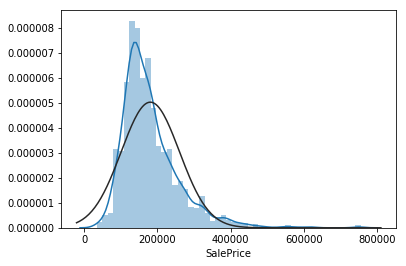

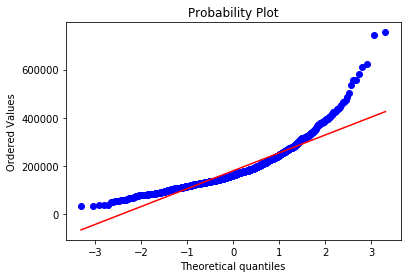

In [28]:
from scipy import stats
#histogram and normal probability plot
sns.distplot(y, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(y, plot=plt)

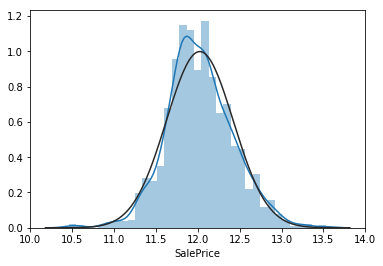

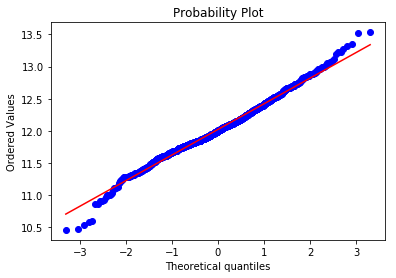

In [29]:
#applying log transformation
y = np.log1p(y)
#transformed histogram and normal probability plot
sns.distplot(y, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(y, plot=plt)

#### GrLivArea

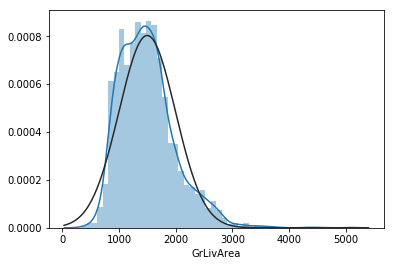

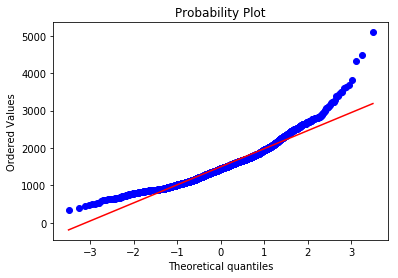

In [30]:
sns.distplot(df.GrLivArea, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.GrLivArea, plot=plt)

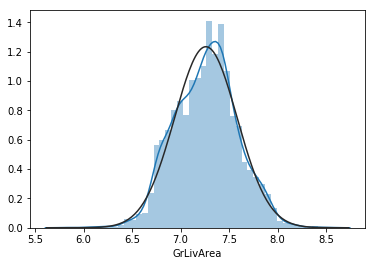

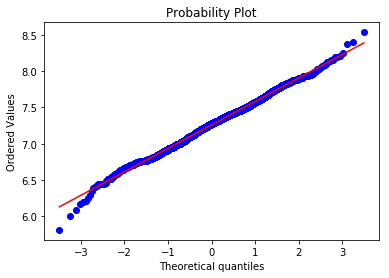

In [31]:
df.loc[:, 'GrLivArea'] = np.log1p(df.GrLivArea)
sns.distplot(df.GrLivArea, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.GrLivArea, plot=plt)

#### TotalBsmtSF

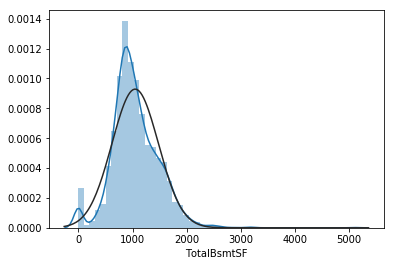

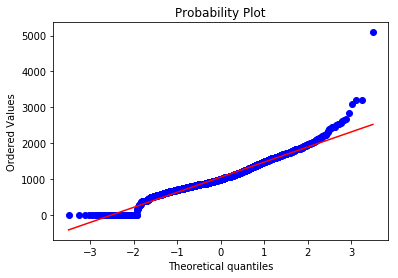

In [32]:
sns.distplot(df.TotalBsmtSF, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.TotalBsmtSF, plot=plt)

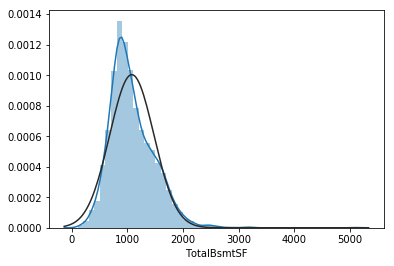

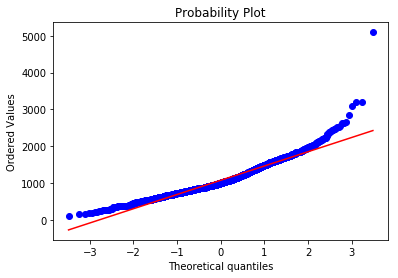

In [33]:
sns.distplot(df.loc[df.TotalBsmtSF > 0, 'TotalBsmtSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.TotalBsmtSF > 0, 'TotalBsmtSF'], plot=plt)

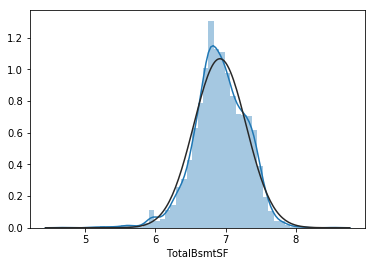

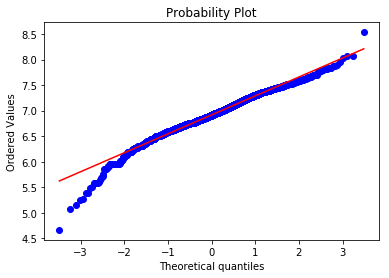

In [34]:
df.loc[df.TotalBsmtSF > 0, 'TotalBsmtSF'] = np.log1p(df.TotalBsmtSF)
sns.distplot(df.loc[df.TotalBsmtSF > 0, 'TotalBsmtSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.TotalBsmtSF > 0, 'TotalBsmtSF'], plot=plt)

#### MasVnrArea

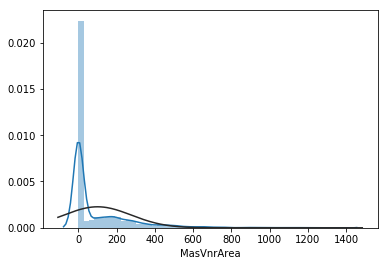

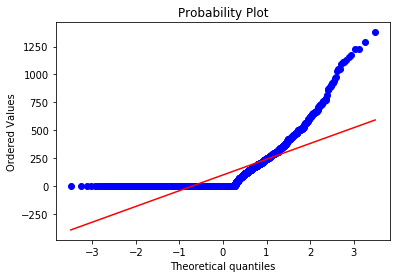

In [35]:
sns.distplot(df.MasVnrArea, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.MasVnrArea, plot=plt)

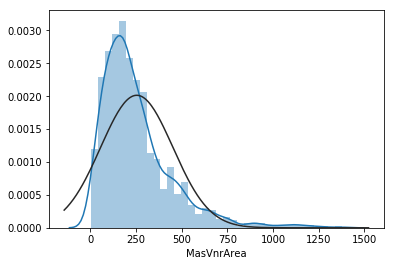

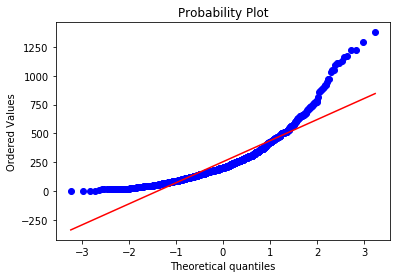

In [36]:
sns.distplot(df.loc[df.MasVnrArea > 0, 'MasVnrArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.MasVnrArea > 0, 'MasVnrArea'], plot=plt)

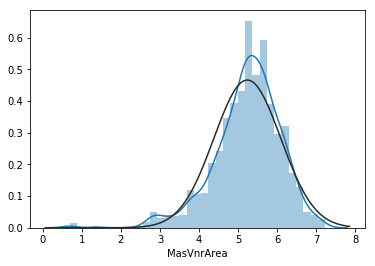

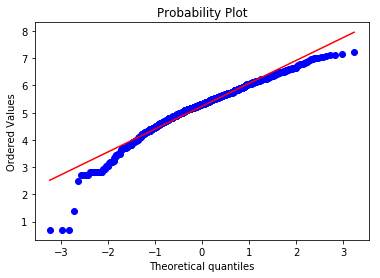

In [37]:
df.loc[:, 'MasVnrArea'] = np.log1p(df.MasVnrArea)
sns.distplot(df.loc[df.MasVnrArea > 0, 'MasVnrArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.MasVnrArea > 0, 'MasVnrArea'], plot=plt)

#### WoodDeckSF

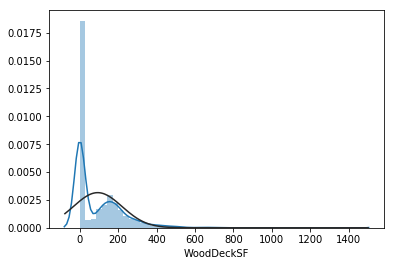

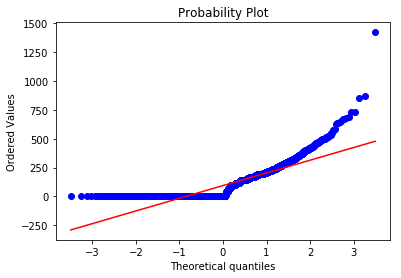

In [38]:
sns.distplot(df.WoodDeckSF, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.WoodDeckSF, plot=plt)

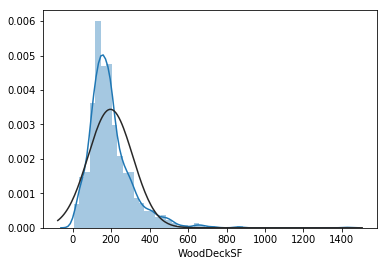

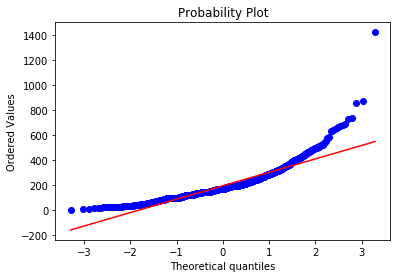

In [39]:
sns.distplot(df.loc[df.WoodDeckSF > 0, 'WoodDeckSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.WoodDeckSF > 0, 'WoodDeckSF'], plot=plt)

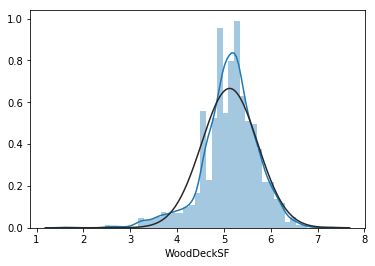

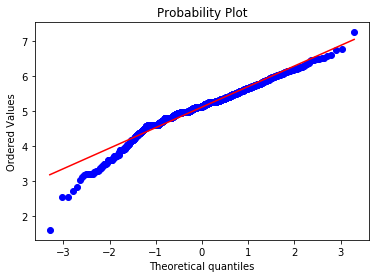

In [40]:
df.loc[df.WoodDeckSF > 0, 'WoodDeckSF'] = np.log1p(df.loc[df.WoodDeckSF > 0, 'WoodDeckSF'])
sns.distplot(df.loc[df.WoodDeckSF > 0, 'WoodDeckSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.WoodDeckSF > 0, 'WoodDeckSF'], plot=plt)

#### OpenPorshSF

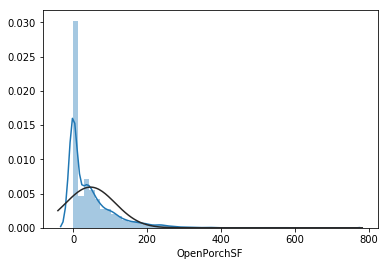

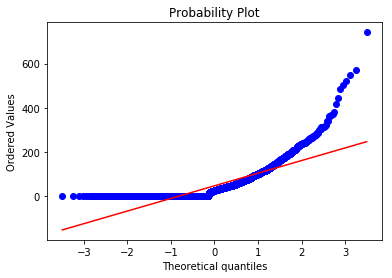

In [41]:
sns.distplot(df.OpenPorchSF, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.OpenPorchSF, plot=plt)

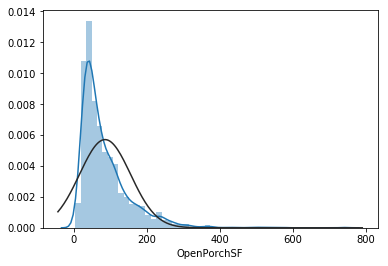

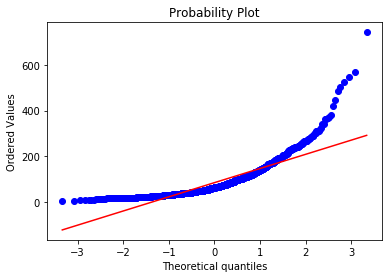

In [42]:
sns.distplot(df.loc[df.OpenPorchSF > 0, 'OpenPorchSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.OpenPorchSF > 0, 'OpenPorchSF'], plot=plt)

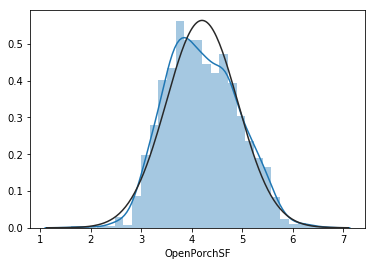

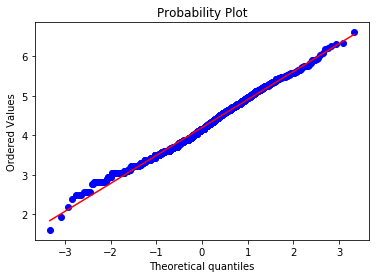

In [43]:
df.loc[df.OpenPorchSF > 0, 'OpenPorchSF'] = np.log1p(df.loc[df.OpenPorchSF > 0, 'OpenPorchSF'])
sns.distplot(df.loc[df.OpenPorchSF > 0, 'OpenPorchSF'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.OpenPorchSF > 0, 'OpenPorchSF'], plot=plt)

#### GarageArea

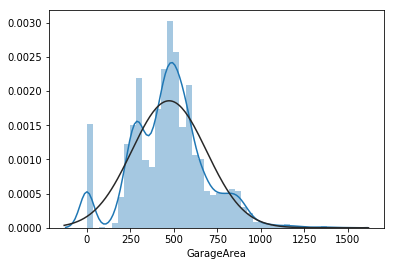

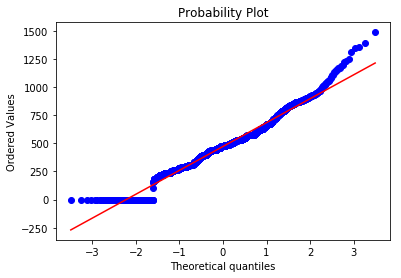

In [52]:
sns.distplot(df.GarageArea, fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.GarageArea, plot=plt)

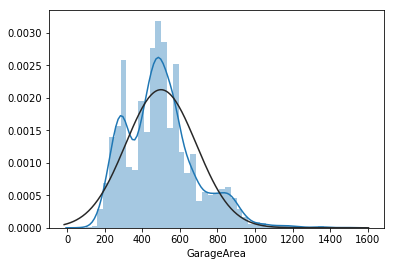

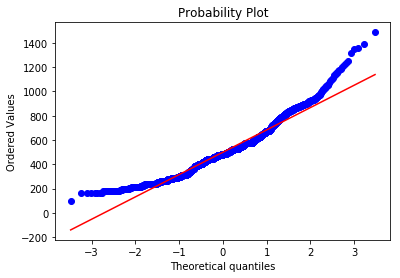

In [53]:
sns.distplot(df.loc[df.GarageArea > 0, 'GarageArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.GarageArea > 0, 'GarageArea'], plot=plt)

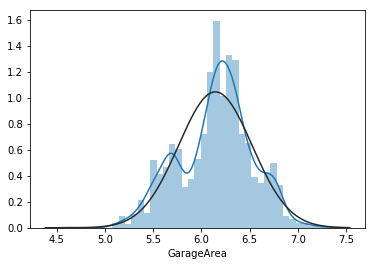

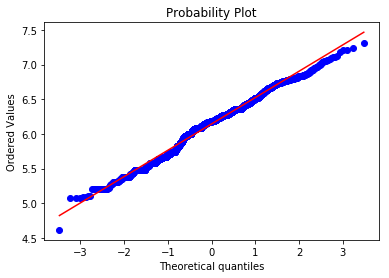

In [55]:
df.loc[df.GarageArea > 0, 'GarageArea'] = np.log1p(df.loc[df.GarageArea > 0, 'GarageArea'])
sns.distplot(df.loc[df.GarageArea > 0, 'GarageArea'], fit=stats.norm)
fig = plt.figure()
res = stats.probplot(df.loc[df.GarageArea > 0, 'GarageArea'], plot=plt)

## Label Encoding

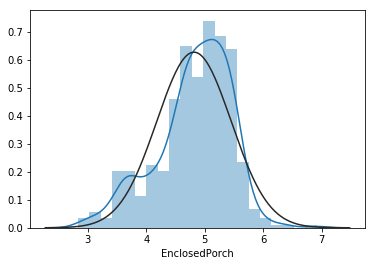

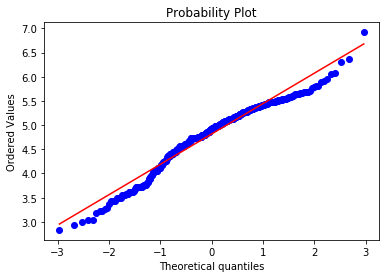

In [58]:
#df.loc[df.EnclosedPorch > 0, 'EnclosedPorch'] = np.log1p(df.loc[df.EnclosedPorch > 0, 'EnclosedPorch'])
sns.distplot(np.log1p(df.loc[df.EnclosedPorch > 0, 'EnclosedPorch']), fit=stats.norm)
fig = plt.figure()
res = stats.probplot(np.log1p(df.loc[df.EnclosedPorch > 0, 'EnclosedPorch']), plot=plt)

Before we do Label Encoding we'll transform some numerical categorical data into str.

In [65]:
df.MSSubClass = df.MSSubClass.astype(str)

In [66]:
df.MSSubClass = df.MSSubClass.astype('category', ordered=True, categories=['20', '30', '40', '45', '50', '60', '70', '75', '80', '85', '90', '120', '150', '160', '180', '190']).cat.codes
df.LotShape = df.LotShape.astype('category', ordered=True, categories=['Reg', 'IR1', 'IR2', 'IR3']).cat.codes
df.LandSlope = df.LandSlope.astype('category', ordered=True, categories=['Gtl', 'Mod', 'Sev']).cat.codes
df.ExterQual = df.ExterQual.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'Po']).cat.codes
df.ExterCond = df.ExterCond.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'Po']).cat.codes
df.BsmtQual = df.BsmtQual.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None']).cat.codes
df.BsmtCond = df.BsmtCond.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None']).cat.codes
df.BsmtExposure = df.BsmtExposure.astype('category', ordered=True, categories=['Gd', 'Av', 'Mn', 'No', 'None']).cat.codes
df.BsmtFinType1 = df.BsmtFinType1.astype('category', ordered=True, categories=['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None']).cat.codes
df.BsmtFinType2 = df.BsmtFinType2.astype('category', ordered=True, categories=['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'None']).cat.codes
df.HeatingQC = df.HeatingQC.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'Po']).cat.codes
df.KitchenQual = df.KitchenQual.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'Po']).cat.codes
df.Functional = df.Functional.astype('category', ordered=True, categories=['Typ', 'Min1', 'Min2', 'Mod', 'Maj1', 'Maj2', 'Sev', 'Sal']).cat.codes
df.FireplaceQu = df.FireplaceQu.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None']).cat.codes
df.GarageFinish = df.GarageFinish.astype('category', ordered=True, categories=['Fin', 'RFn', 'Unf', 'None']).cat.codes
df.GarageQual = df.GarageQual.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None']).cat.codes
df.GarageCond = df.GarageCond.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'Po', 'None']).cat.codes
df.PavedDrive = df.PavedDrive.astype('category', ordered=True, categories=['Y', 'P', 'N']).cat.codes
df.PoolQC = df.PoolQC.astype('category', ordered=True, categories=['Ex', 'Gd', 'TA', 'Fa', 'None']).cat.codes
df.Fence = df.Fence.astype('category', ordered=True, categories=['GdPrv', 'MnPrv', 'GdWo', 'MnWw', 'None']).cat.codes

### Create dummy variables

For the rest string features we'll create dummies.

In [69]:
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)
df.shape

(2915, 200)

Split our data back into train and test

In [75]:
train = df[:train_last_id]
test = df[train_last_id:]
X = train

In [63]:
from sklearn.model_selection import KFold, cross_val_score
def rmsle_cv(model):
    kf = KFold(5, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [76]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=402,random_state=42)
score = rmsle_cv(forest)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Random Forest score: 0.1374 (0.0047)



In [86]:
import xgboost
xgb = xgboost.XGBRegressor(n_estimators=402, random_state =42)
score = rmsle_cv(xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.1188 (0.0055)



In [ ]:
xgb.fit(X, y)

In [ ]:
res = pd.DataFrame()
res['Id'] = test.index
res['SalePrice'] = np.expm1(xgb.predict(test))
res.to_csv('submission.csv',index=False)

> ## Kaggle kernels that were very helpful for me in creating this notebook.

https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python


https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard